In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail.csv")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df = df[df['Customer ID'].notnull()]


In [4]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)


In [7]:
df['TotalAmount'] = df['Quantity'] * df['Price']


In [8]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [9]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalAmount': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,3,7,158.50
12358.0,30,1,1429.83
12359.0,21,2,838.89
12362.0,37,1,130.00
12417.0,28,2,317.60


In [11]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1], duplicates='drop')
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=False, duplicates='drop') + 1
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=False, duplicates='drop') + 1



In [12]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + \
                   rfm['F_score'].astype(str) + \
                   rfm['M_score'].astype(str)


In [13]:
def segment_customer(row):
    if row['R_score'] == 4 and row['F_score'] == 4:
        return 'Champions'
    elif row['F_score'] >= 3:
        return 'Loyal'
    elif row['R_score'] <= 2:
        return 'At Risk'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


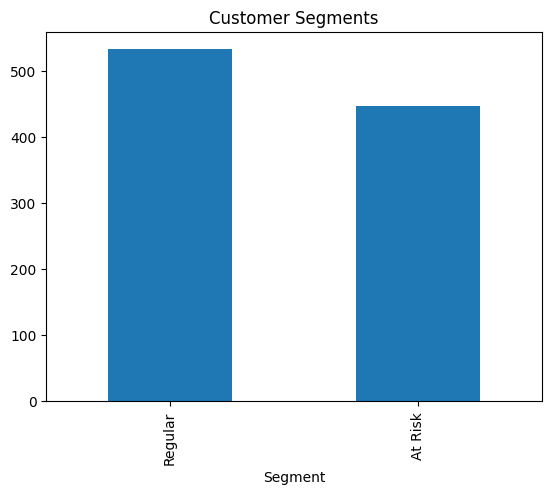

In [14]:
rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Customer Segments")
plt.show()


In [15]:
rfm.to_csv("rfm_segments.csv")


In [16]:
from google.colab import files
files.download("rfm_segments.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>